# 선형회귀 직접 구현

## 데이터셋 준비

 - 사이킷런 임의 회귀 데이터 생성

In [6]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [ ]:
# 가상의 데이터 생성
data = make_regression(n_samples = 1000, n_features = 1, bias = 1000, noise = 50)
# 1000개의 데이터, 1개의 특성 가진 데이터 셋을 생성합니다.

#X_1 -> data[0] / y_1 -> data[1]

In [ ]:
plt.scatter(data[0], data[1])
plt.show()

In [ ]:
x_train = data[0]
y_train = data[1]

n_data = len(x_train)
print(n_data, x_train.shape, y_train.shape)

1000 (1000, 1) (1000,)


In [ ]:
n_data = x_train.shape[0]

## Hypothesis, Cost 정의

 - hypothesis: x_train * w1 + w0
 - cost : RSS -> MSE

Residual Sum of sqaure = SSE

In [ ]:
hypothesis = w1 * x_train + w0 # y_pred (1000, )

cost = 1/n_data * np.sum((hypothesis-y_train)**2) # (1000,) -> sum (1,)

## Weight 초기화

In [ ]:
w1 = np.random.rand(1)
w0 = np.random.rand(1)
print(w1, w0)

[0.52596935] [0.91669212]


## y_pred 계산

-> hypothesis

In [ ]:
y_pred = w1 * x_train + w0

In [ ]:
y_pred.shape

(1000, 1)

## cost 계산

 - cost = np.sum((y_train - y_pred) ** 2) / n_data

In [ ]:
np.array([1, 2, 3]) + 3

array([4, 5, 6])

In [ ]:
y_pred.shape

(1000, 1)

In [ ]:
y_train.shape

(1000,)

In [ ]:
(y_pred.reshape(-1) - y_train).shape

(1000,)

In [ ]:
cost = np.sum((y_pred.reshape(-1) - y_train)**2) / n_data

cost

1027083.5693933568

## Weight 업데이트

 - w1 = (-1) * np.sum((y_train - y_pred)  * x_train) * 2 / n_data
 - w0 = (-1) * np.sum(y_train - y_pred) * 2 / n_data

In [ ]:
x_train.shape

(1000, 1)

In [ ]:
y_train.shape

(1000,)

In [ ]:
y_train.reshape(-1, 1).shape

(1000, 1)

In [ ]:
((y_pred - y_train.reshape(-1, 1)) * x_train).shape

(1000, 1)

In [ ]:
w1 -= learning_rate * np.sum((y_pred - y_train.reshape(-1, 1)) * x_train) * 2 / n_data
w0 -= learning_rate * np.sum((y_pred - y_train.reshape(-1, 1))) * 2 / n_data

In [ ]:
w1, w0

(array([401.58824344]), array([2017.69770095]))

## 반복

 - epochs : 반복횟수
 - learning rate : 학습률

 - 출력 지우기
    - from IPython.display import clear_output
    - clear_output()

In [ ]:
epochs = 1000
learning_rate = 0.01

In [ ]:
cost_list = []

for epoch in range(epochs):
    # 1. y_pred 계산
    y_pred = w1 * x_train + w0 # (1000, 1)

    # 2. cost 계산
    cost = np.mean((y_pred.reshape(-1) - y_train) ** 2)

    # 3. weight 업데이트
    gradient_w1 = np.sum((y_pred - y_train.reshape(-1, 1)) * x_train * 2) / n_data
    w1 -= learning_rate * gradient_w1

    gradient_w0 = np.sum((y_pred - y_train.reshape(-1, 1)) * 2) / n_data
    w0 -= learning_rate * gradient_w0

    cost_list.append(cost)


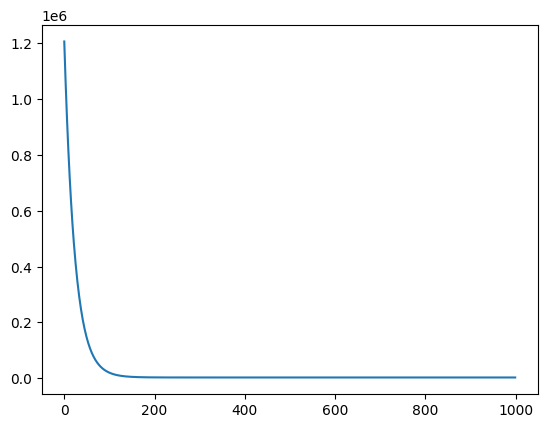

In [ ]:
plt.plot(cost_list)
plt.show()

In [ ]:
w1, w0

(array([90.30190901]), array([999.24622165]))

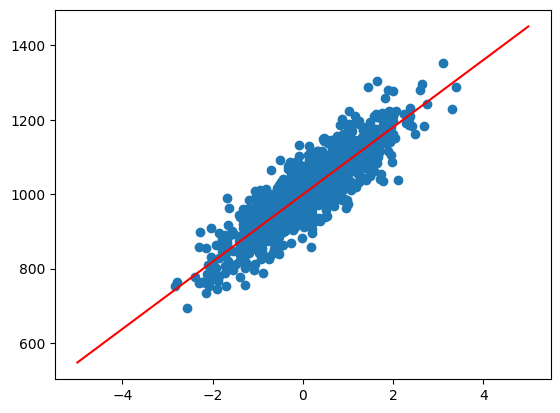

In [ ]:
plt.plot([-5, 5], [-5*w1+w0, 5*w1+w0], color='r')
plt.scatter(x_train, y_train)
plt.show()

In [ ]:
class SimpleLinearRegression:

    def __init__(self):
        ...

    def fit(self, x_data, y_data):
        ...

    def predict(self, x_data):
        return

    def score(self, y1, y2):
        return


In [7]:
data = make_regression(n_samples = 1000, n_features = 5, bias = 1000, noise = 50)

x_train = data[0]
y_train = data[1]

In [8]:
x_train[0]

array([ 0.78324805, -0.71713637, -1.37299789, -0.79789149, -0.78746286])

In [10]:
x_train.shape, y_train.shape

((1000, 5), (1000,))

In [ ]:
plt.scatter(x_train[:, 3], y_train)
plt.show()

In [ ]:
# 선형회귀 가설함수
Hx = w0 + w1*x_train[:, 0] + w2 * x_train[:, 1]+ ... w5 *x_train[:, 4]

In [14]:
w = np.random.rand(x_train.shape[1])

In [19]:
w0 = np.random.rand(1)

In [22]:
y_pred = (w * x_train).sum(axis=1) + w0

In [24]:
y_pred.shape

(1000,)

In [25]:
# cost 계산
cost = np.mean((y_pred - y_train)**2)

In [26]:
cost

1017661.9214692835

In [27]:
# weight 업데이트
for i in range(x_train.shape[1]):
    # w[i] -= gradient
    w[i] -= np.mean((y_pred - y_train) * x_train[:, i]) * 2 * 0.01 #learning rate

w0 -= np.mean(y_pred-y_train) * 2 * 0.01 # learning rate

In [28]:
w

array([1.81386621, 0.41938469, 2.20871066, 0.38674217, 2.94096052])

In [29]:
w0

array([20.22054975])

In [30]:
# 종합
learning_rate = 0.01

cost_list = []
for epoch in range(1000):
    y_pred = (w * x_train).sum(axis=1) + w0
    cost = np.mean((y_pred - y_train)**2)

    # weight 업데이트
    for i in range(x_train.shape[1]):
        # w[i] -= gradient
        w[i] -= np.mean((y_pred - y_train) * x_train[:, i]) * 2 * learning_rate

    w0 -= np.mean(y_pred-y_train) * 2 * learning_rate

    cost_list.append(cost)

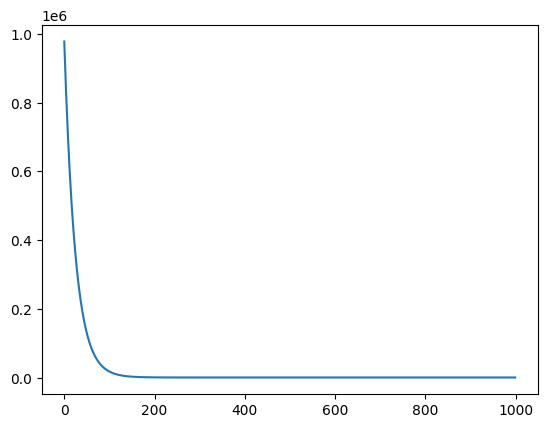

In [31]:
plt.plot(cost_list)

In [41]:
x_data = np.hstack([x_train, np.ones((1000, 1))])


In [37]:
w = np.random.rand(x_train.shape[1] + 1)

In [38]:
w

array([0.06784779, 0.71085861, 0.648803  , 0.81749113, 0.36667521,
       0.75289485])

In [ ]:
w1x1+ w2x2+ ... + w0x0 = WX

In [45]:
cost = np.mean(( (w * x_data).sum(axis=1) - y_train)**2)

In [46]:
cost

1016710.4966582975

In [55]:
np.mean(((y_pred - y_train).reshape(-1, 1) * x_data), axis=0)

array([-7.59383675e-07,  1.49015761e-07,  5.49462432e-07, -7.61698117e-07,
        5.50966954e-07, -2.29092837e-06])

In [48]:
x_data.shape

(1000, 6)

In [ ]:
# weight 업데이트 ??
w[i] -= np.mean((y_pred - y_train) * x_train[:, i]) * 2 * learning_rate

In [ ]:
w -= np.mean(((y_pred - y_train).reshape(-1, 1) * x_data), axis=0) * 2 * learning_rate